Saving student_data.csv to student_data (3).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StudentID       20 non-null     int64  
 1   StudyHours      20 non-null     float64
 2   PreviousScores  20 non-null     int64  
 3   FinalExamScore  20 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 772.0 bytes
None
   StudentID  StudyHours  PreviousScores  FinalExamScore
0          1    8.777482              75              64
1          2    9.161915              55              82
2          3    3.278010              77              70
3          4    4.500247              60              60
4          5    2.264931              72              60
MAE: 22.57
MSE: 712.9857999999999
R2 Score: -1.6098770990619995


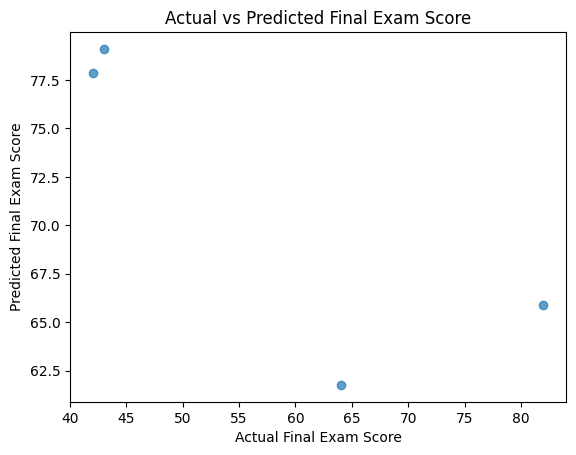

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files

# Upload the dataset
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(file_name)

# Display basic info and first few rows
print(df.info())
print(df.head())

# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables if any
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split data into features and target (using 'FinalExamScore' as the target column)
X = df.drop(columns=['FinalExamScore'])
y = df['FinalExamScore']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Final Exam Score')
plt.ylabel('Predicted Final Exam Score')
plt.title('Actual vs Predicted Final Exam Score')
plt.show()
